In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv(r'D:\deep learning\EXPOSYS DATA\diabetes.csv')
print("shape:",df.shape)
df.head()

shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X =  pd.DataFrame(ss.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=df['Outcome']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [5]:
from sklearn.metrics import accuracy_score
import joblib

In [6]:
# load Models
linear_model=joblib.load('linear_model.sav')
random_forest_classifier=joblib.load('random_forest_classifer.sav')
kneighbourclassifier=joblib.load('kneighbors_classifier.sav')
support_vector_machine=joblib.load('Support_vector_machine.sav')
decision_tree_classifier=joblib.load('Decision_tree_classifier.sav')
gradinet_boost_c=joblib.load('GradientBoostingClassifier.sav')


In [7]:
#accuracy of models for training data
LR=accuracy_score(y_train,linear_model.predict(X_train))*100
RFC=accuracy_score(y_train,random_forest_classifier.predict(X_train))*100
KNC=accuracy_score(y_train,kneighbourclassifier.predict(X_train))*100
SVM=accuracy_score(y_train,support_vector_machine.predict(X_train))*100
DTC=accuracy_score(y_train,decision_tree_classifier.predict(X_train))*100
GBC=accuracy_score(y_train,gradinet_boost_c.predict(X_train))*100

train_acc_list=[LR,RFC,KNC,SVM,DTC,GBC]


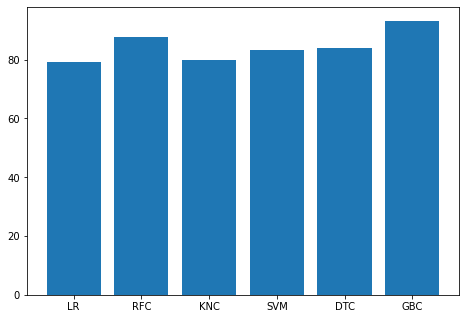

LR: 79.14338919925513 
RFC: 87.70949720670392 
KNC: 79.70204841713222 
SVM: 83.42644320297951 
DTC: 83.79888268156425 
GBC: 93.29608938547486


In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LR', 'RFC', 'KNC', 'SVM', 'DTC','GBC']
model_accuracy = [LR,RFC,KNC,SVM,DTC,GBC]
ax.bar(models,model_accuracy)
plt.show()
print("LR:",LR,"\nRFC:",RFC,"\nKNC:",KNC,"\nSVM:",SVM,"\nDTC:",DTC,"\nGBC:",GBC)


In [9]:
import joblib
def predict_diabetes():
    pre=float(input("Enter Pregnancies:"))
    glu=float(input("Enter Glucose:"))
    bp=float(input("Enter Bloodpressure:"))
    st=float(input("Enter Skin_thickness:"))
    ins=float(input("Enter Insulin:"))
    bmi=float(input("Enter BMI:"))
    dbf=float(input("Enter Diabetes_predigree_function:"))
    age=float(input('Enter Age:'))
    
    pred=[[pre,glu,bp,st,ins,bmi,dbf,age]]
    
    gradinet_boost_c=joblib.load('GradientBoostingClassifier.sav')
    prediction=gradinet_boost_c.predict(pred)
    
    if(prediction==1):
        result='Report: Diabetes predicted'
    else:
        result='Report: Normal'
        
    return result


result=predict_diabetes()
print(result)


Enter Pregnancies:6
Enter Glucose:148
Enter Bloodpressure:72
Enter Skin_thickness:35
Enter Insulin:0
Enter BMI:33.6
Enter Diabetes_predigree_function:0.8
Enter Age:58
Report: Diabetes predicted


In [25]:
result=predict_diabetes()
print(result)

Enter Pregnancies:6
Enter Glucose:148
Enter Bloodpressure:72
Enter Skin_thickness:35
Enter Insulin:0
Enter BMI:33.6
Enter Diabetes_predigree_function:0.64
Enter Age:80
Report: Diabetes predicted
